In [209]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [210]:
df = pd.read_csv('final_dataset_with_odds.csv')

In [211]:
df
#we have a csv with 6000 rows and 55 columns, the initial columns are football stats during the game - will be interesting to use them
#The later columns are betting odds by various bookies
#https://www.football-data.co.uk/ratings.pdf amazing explanation about how odds are calculated is given here

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,FTR.1,FINAL_FTR,b365_FTR,iw_FTR,lb_FTR,wh_FTR,b365_tar,iw_tar,lb_tar,wh_tar
0,0,2002-08-17,Blackburn,Sunderland,0,0,NH,0,0,0,...,NH,0,1,1,1,1,1,1,1,1
1,1,2002-08-17,Charlton,Chelsea,2,3,NH,0,0,0,...,NH,0,0,0,0,0,0,0,0,0
2,2,2002-08-17,Everton,Tottenham,2,2,NH,0,0,0,...,NH,0,1,1,1,1,1,1,1,1
3,3,2002-08-17,Fulham,Bolton,4,1,H,0,0,0,...,H,1,1,1,1,1,0,0,0,0
4,4,2002-08-17,Leeds,Man City,3,0,H,0,0,0,...,H,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5995,2018-12-15,Watford,Cardiff,3,2,H,20,15,23,...,H,1,1,1,1,1,0,0,0,0
5996,5996,2018-12-15,Wolves,Bournemouth,2,0,H,17,25,19,...,H,1,1,1,1,1,0,0,0,0
5997,5997,2018-12-16,Brighton,Chelsea,1,2,NH,19,33,22,...,NH,0,0,0,0,0,0,0,0,0
5998,5998,2018-12-16,Liverpool,Man United,3,1,H,34,28,6,...,H,1,1,1,1,1,0,0,0,0


In [212]:
df.drop('Unnamed: 0', axis=1, inplace=True) #cleaning unnamed column 

In [213]:
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,FTR.1,FINAL_FTR,b365_FTR,iw_FTR,lb_FTR,wh_FTR,b365_tar,iw_tar,lb_tar,wh_tar
0,2002-08-17,Blackburn,Sunderland,0,0,NH,0,0,0,0,...,NH,0,1,1,1,1,1,1,1,1
1,2002-08-17,Charlton,Chelsea,2,3,NH,0,0,0,0,...,NH,0,0,0,0,0,0,0,0,0
2,2002-08-17,Everton,Tottenham,2,2,NH,0,0,0,0,...,NH,0,1,1,1,1,1,1,1,1
3,2002-08-17,Fulham,Bolton,4,1,H,0,0,0,0,...,H,1,1,1,1,1,0,0,0,0
4,2002-08-17,Leeds,Man City,3,0,H,0,0,0,0,...,H,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2018-12-15,Watford,Cardiff,3,2,H,20,15,23,30,...,H,1,1,1,1,1,0,0,0,0
5996,2018-12-15,Wolves,Bournemouth,2,0,H,17,25,19,26,...,H,1,1,1,1,1,0,0,0,0
5997,2018-12-16,Brighton,Chelsea,1,2,NH,19,33,22,13,...,NH,0,0,0,0,0,0,0,0,0
5998,2018-12-16,Liverpool,Man United,3,1,H,34,28,6,26,...,H,1,1,1,1,1,0,0,0,0


In [214]:
df.dtypes
df['Date'] = pd.to_datetime(df['Date']) #this step is important as we need to perform various operation on these columns and having the right datatype will make it less error prone

In [215]:
df.dtypes

Date        datetime64[ns]
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
                 ...      
wh_FTR               int64
b365_tar             int64
iw_tar               int64
lb_tar               int64
wh_tar               int64
Length: 64, dtype: object

In [216]:
#just fan boy things, I might use it later to make some graphs
team = 'Arsenal'
df_ars_home = df[df['HomeTeam']==team]
df_ars_away = df[df['AwayTeam']==team]

In [217]:
df_ars_away

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,FTR.1,FINAL_FTR,b365_FTR,iw_FTR,lb_FTR,wh_FTR,b365_tar,iw_tar,lb_tar,wh_tar
17,2002-08-24,West Ham,Arsenal,2,2,NH,0,2,4,0,...,NH,0,0,0,0,0,0,0,0,0
32,2002-09-01,Chelsea,Arsenal,1,1,NH,6,9,5,4,...,NH,0,0,0,0,0,0,0,0,0
44,2002-09-14,Charlton,Arsenal,0,3,NH,6,10,5,5,...,NH,0,0,0,0,0,0,0,0,0
66,2002-09-28,Leeds,Arsenal,1,4,NH,10,17,5,7,...,NH,0,0,0,0,0,0,0,0,0
80,2002-10-19,Everton,Arsenal,2,1,H,11,21,11,8,...,H,1,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5907,2018-10-07,Fulham,Arsenal,1,5,NH,8,14,16,9,...,NH,0,0,0,0,0,0,0,0,0
5927,2018-10-28,Crystal Palace,Arsenal,2,2,NH,5,22,11,11,...,NH,0,0,0,0,0,0,0,0,0
5957,2018-11-25,Bournemouth,Arsenal,1,2,NH,21,26,16,15,...,NH,0,0,0,0,0,0,0,0,0
5977,2018-12-05,Man United,Arsenal,2,2,NH,22,32,23,18,...,NH,0,1,1,1,1,1,1,1,1


In [218]:
df_arsenal = pd.concat([df_ars_home, df_ars_away])
df_ars_draw = df_arsenal[df_arsenal['FTR'] == 'D']
df_arsenal

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,FTR.1,FINAL_FTR,b365_FTR,iw_FTR,lb_FTR,wh_FTR,b365_tar,iw_tar,lb_tar,wh_tar
6,2002-08-18,Arsenal,Birmingham,2,0,H,0,0,0,0,...,H,1,1,1,1,1,0,0,0,0
18,2002-08-27,Arsenal,West Brom,5,2,H,4,1,2,4,...,H,1,1,1,1,1,0,0,0,0
34,2002-09-10,Arsenal,Man City,2,1,H,9,1,4,4,...,H,1,1,1,1,1,0,0,0,0
52,2002-09-21,Arsenal,Bolton,2,1,H,12,6,6,9,...,H,1,1,1,1,1,0,0,0,0
73,2002-10-06,Arsenal,Sunderland,3,1,H,21,3,8,10,...,H,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5907,2018-10-07,Fulham,Arsenal,1,5,NH,8,14,16,9,...,NH,0,0,0,0,0,0,0,0,0
5927,2018-10-28,Crystal Palace,Arsenal,2,2,NH,5,22,11,11,...,NH,0,0,0,0,0,0,0,0,0
5957,2018-11-25,Bournemouth,Arsenal,1,2,NH,21,26,16,15,...,NH,0,0,0,0,0,0,0,0,0
5977,2018-12-05,Man United,Arsenal,2,2,NH,22,32,23,18,...,NH,0,1,1,1,1,1,1,1,1


In [219]:
start_date = '2015-01-01'
end_date = '2018-12-31'
filtered_data = df_ars_home[(df_ars_home['Date'] >= start_date) & (df_ars_home['Date'] <= end_date)]
filtered_data

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,FTR.1,FINAL_FTR,b365_FTR,iw_FTR,lb_FTR,wh_FTR,b365_tar,iw_tar,lb_tar,wh_tar
4519,2015-01-11,Arsenal,Stoke,3,0,H,34,22,25,24,...,H,1,1,1,1,1,0,0,0,0
4539,2015-02-01,Arsenal,Aston Villa,5,0,H,39,11,25,25,...,H,1,1,1,1,1,0,0,0,0
4551,2015-02-10,Arsenal,Leicester,2,1,H,45,21,27,38,...,H,1,1,1,1,1,0,0,0,0
4577,2015-03-01,Arsenal,Everton,2,0,H,49,33,29,37,...,H,1,1,1,1,1,0,0,0,0
4590,2015-03-14,Arsenal,West Ham,3,0,H,51,39,29,33,...,H,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5919,2018-10-22,Arsenal,Leicester,3,1,H,19,14,10,12,...,H,1,1,1,1,1,0,0,0,0
5930,2018-11-03,Arsenal,Liverpool,1,1,NH,24,20,13,4,...,NH,0,0,0,0,0,0,0,0,0
5946,2018-11-11,Arsenal,Wolves,1,1,NH,25,11,14,12,...,NH,0,1,1,1,1,1,1,1,1
5967,2018-12-02,Arsenal,Tottenham,4,2,H,28,23,16,11,...,H,1,1,0,1,1,0,1,0,0


# Wins arsenal 2002-2018

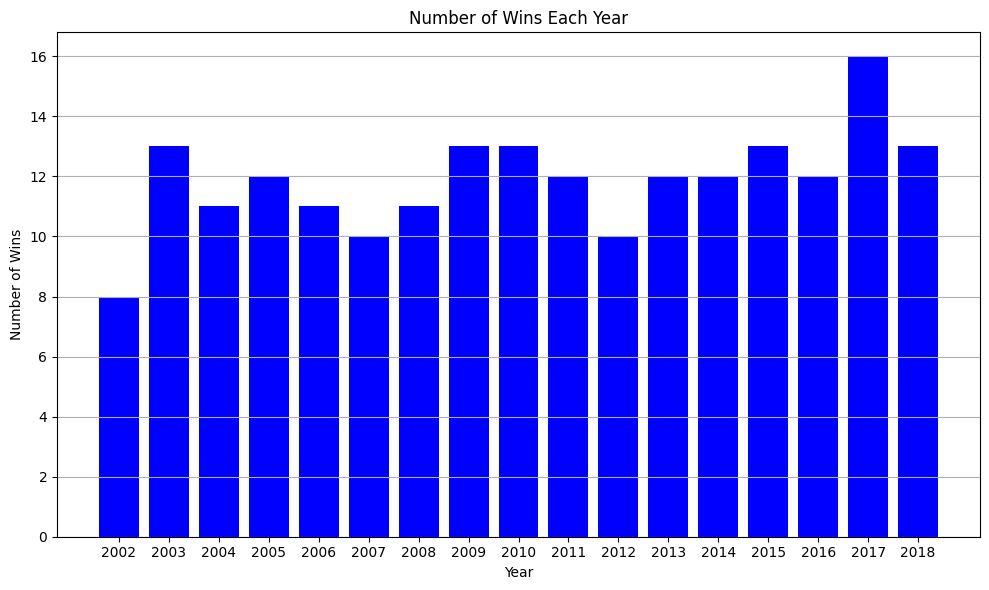

In [220]:
wins = df_ars_home[df_ars_home['FTR']=='H']
wins_yearly = wins.groupby(wins['Date'].dt.year)['FTR'].count()
wins_yearly
plt.figure(figsize=(10, 6))
plt.bar(wins_yearly.index, wins_yearly.values, color='blue')
plt.title('Number of Wins Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.xticks(wins_yearly.index)  
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Losses Arsenal 2002-2018

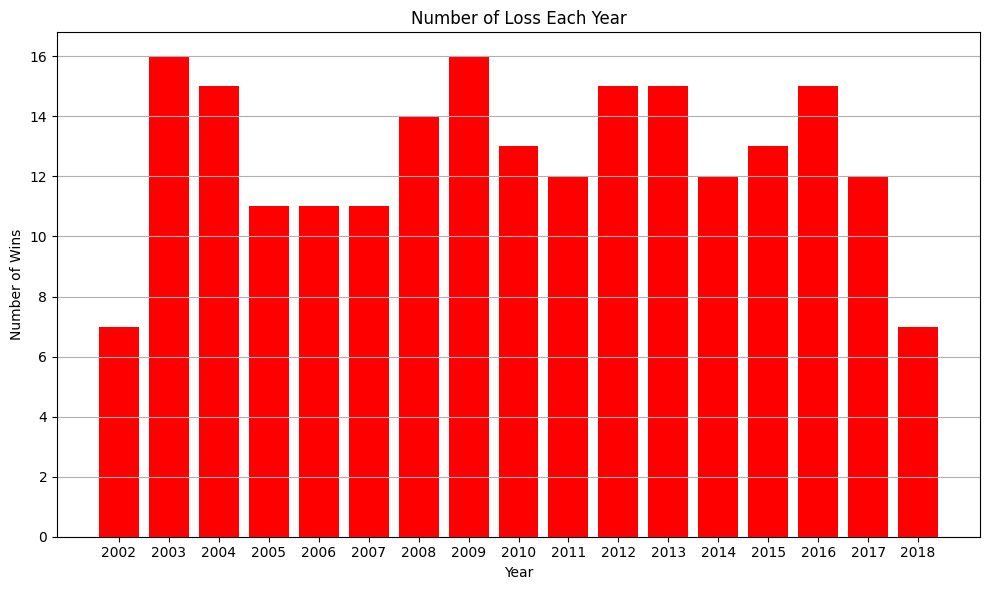

In [221]:
loss = df_ars_away[df_ars_away['FTR']=='NH']
loss_yearly = loss.groupby(loss['Date'].dt.year)['FTR'].count()
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(loss_yearly.index, loss_yearly.values, color='red')
plt.title('Number of Loss Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.xticks(loss_yearly.index)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [222]:
#this dataset has no record of draw wins but odds for draw that amazing XD, moving on
df_ars_draw = df[((df['HomeTeam'] == team) | (df['AwayTeam'] == team)) & (df['FTR'] == 'D')]
df_ars_draw

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,FTR.1,FINAL_FTR,b365_FTR,iw_FTR,lb_FTR,wh_FTR,b365_tar,iw_tar,lb_tar,wh_tar


In [223]:
yr = 2018
ars_18_win = wins_yearly.loc[yr]
ars_18_loss =loss_yearly.loc[yr]
total_matches = ars_18_loss+ars_18_win
total_matches

20

# Draws Arsenal 2002-2018

2002
Wins in Year: 2002, 8
Loss in Year: 2002, 7
Draw in year: 2002, 23
TOTAL Matches:38
2003
Wins in Year: 2003, 13
Loss in Year: 2003, 16
Draw in year: 2003, 9
TOTAL Matches:38
2004
Wins in Year: 2004, 11
Loss in Year: 2004, 15
Draw in year: 2004, 12
TOTAL Matches:38
2005
Wins in Year: 2005, 12
Loss in Year: 2005, 11
Draw in year: 2005, 15
TOTAL Matches:38
2006
Wins in Year: 2006, 11
Loss in Year: 2006, 11
Draw in year: 2006, 16
TOTAL Matches:38
2007
Wins in Year: 2007, 10
Loss in Year: 2007, 11
Draw in year: 2007, 17
TOTAL Matches:38
2008
Wins in Year: 2008, 11
Loss in Year: 2008, 14
Draw in year: 2008, 13
TOTAL Matches:38
2009
Wins in Year: 2009, 13
Loss in Year: 2009, 16
Draw in year: 2009, 9
TOTAL Matches:38
2010
Wins in Year: 2010, 13
Loss in Year: 2010, 13
Draw in year: 2010, 12
TOTAL Matches:38
2011
Wins in Year: 2011, 12
Loss in Year: 2011, 12
Draw in year: 2011, 14
TOTAL Matches:38
2012
Wins in Year: 2012, 10
Loss in Year: 2012, 15
Draw in year: 2012, 13
TOTAL Matches:38
201

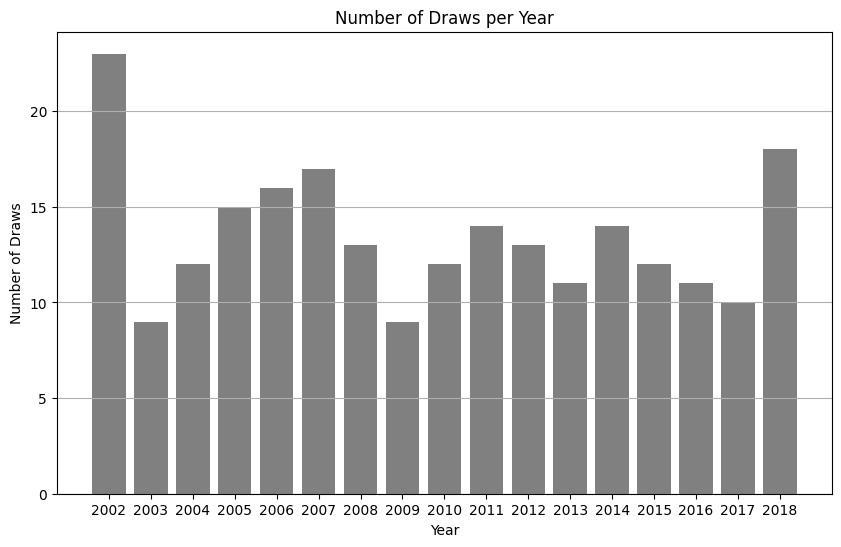

In [224]:
#here some footballing knowledge is used, as we know each season has 38 matches so if we have the wins and losses we also have the draws. Just a little effort to extract those numbers
#38 - (wins+losses), I guess the 
draws_yr = []
for year in range(2002, 2019):
    print(year)
    wins_yr = wins_yearly.loc[year]
    loss_yr = loss_yearly.loc[year]
    print(f"Wins in Year: {year}, {wins_yr}")
    print(f"Loss in Year: {year}, {loss_yr}")
    draws = 38-(wins_yr+loss_yr)
    print(f"Draw in year: {year}, {draws}")
    print(f"TOTAL Matches:{draws+wins_yr+loss_yr}")
    draws_yr.append(draws)

draws_yr
plt.figure(figsize=(10, 6))
plt.bar(range(2002, 2019), draws_yr, color='gray')
plt.xlabel('Year')
plt.ylabel('Number of Draws')
plt.title('Number of Draws per Year')
plt.xticks(range(2002, 2019))
plt.grid(axis='y')
plt.show()

# Label-Encoding home and away team names

In [225]:
columns_to_encode = ['HomeTeam', 'AwayTeam']  # Columns containing team names to be label encoded

label_encoders = {}  # Dictionary to store label encoders for each column

for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column + '_encoded'] = label_encoders[column].fit_transform(df[column])

In [226]:
df #data with team names encoded.

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,b365_FTR,iw_FTR,lb_FTR,wh_FTR,b365_tar,iw_tar,lb_tar,wh_tar,HomeTeam_encoded,AwayTeam_encoded
0,2002-08-17,Blackburn,Sunderland,0,0,NH,0,0,0,0,...,1,1,1,1,1,1,1,1,3,32
1,2002-08-17,Charlton,Chelsea,2,3,NH,0,0,0,0,...,0,0,0,0,0,0,0,0,10,11
2,2002-08-17,Everton,Tottenham,2,2,NH,0,0,0,0,...,1,1,1,1,1,1,1,1,14,34
3,2002-08-17,Fulham,Bolton,4,1,H,0,0,0,0,...,1,1,1,1,0,0,0,0,15,5
4,2002-08-17,Leeds,Man City,3,0,H,0,0,0,0,...,1,1,1,1,0,0,0,0,18,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2018-12-15,Watford,Cardiff,3,2,H,20,15,23,30,...,1,1,1,1,0,0,0,0,35,9
5996,2018-12-15,Wolves,Bournemouth,2,0,H,17,25,19,26,...,1,1,1,1,0,0,0,0,39,6
5997,2018-12-16,Brighton,Chelsea,1,2,NH,19,33,22,13,...,0,0,0,0,0,0,0,0,7,11
5998,2018-12-16,Liverpool,Man United,3,1,H,34,28,6,26,...,1,1,1,1,0,0,0,0,20,22


# Now we do some predictions

In [227]:
df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'HomeTeamLP', 'AwayTeamLP', 'MW',
       'HTFormPtsStr', 'ATFormPtsStr', 'HTFormPts', 'ATFormPts',
       'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5',
       'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'DiffLP', 'B365H', 'B365D',
       'B365A', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'WHH', 'WHD', 'WHA',
       'FTR.1', 'FINAL_FTR', 'b365_FTR', 'iw_FTR', 'lb_FTR', 'wh_FTR',
       'b365_tar', 'iw_tar', 'lb_tar', 'wh_tar', 'HomeTeam_encoded',
       'AwayTeam_encoded'],
      dtype='object')

In [228]:
feature_col = ['b365_FTR','iw_FTR','lb_FTR', 'wh_FTR','B365H','B365D','B365A','IWH','IWD','IWA','LBH','LBD','LBA', 'WHH', 'WHD', 'WHA','HomeTeam_encoded','AwayTeam_encoded']
df_feature = df[feature_col].copy()
df_feature.cov()
feature_col_b365 = ['B365H','B365D','B365A','HomeTeam_encoded','AwayTeam_encoded']
df_365 = df[feature_col_b365].copy()

In [229]:
target_col = ['b365_tar']
target_df = df[target_col].copy()
target_df

,b365_tar
0,1
1,0
2,1
3,0
4,0
...,...
5995,0
5996,0
5997,0
5998,0


In [230]:
df_feature

,b365_FTR,iw_FTR,lb_FTR,wh_FTR,B365H,B365D,B365A,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,HomeTeam_encoded,AwayTeam_encoded
0,1,1,1,1,1.727,3.25,4.333,1.80,3.1,3.80,1.615,3.25,5.00,1.66,3.30,4.50,3,32
1,0,0,0,0,2.800,3.25,2.200,2.90,3.0,2.20,2.800,3.20,2.20,2.75,3.10,2.30,10,11
2,1,1,1,1,2.250,3.25,2.750,2.30,3.0,2.70,2.250,3.20,2.75,2.30,3.10,2.75,14,34
3,1,1,1,1,1.727,3.25,4.333,1.80,3.1,3.80,1.833,3.20,3.75,1.72,3.20,4.33,15,5
4,1,1,1,1,1.667,3.40,4.500,1.70,3.2,4.20,1.615,3.50,4.50,1.66,3.30,4.50,18,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,1,1,1,1.640,3.90,6.000,1.70,3.8,5.00,1.630,3.99,6.37,1.60,3.90,6.00,35,9
5996,1,1,1,1,1.950,3.60,4.330,2.00,3.4,3.80,2.020,3.48,4.20,1.95,3.50,4.00,39,6
5997,0,0,0,0,7.500,4.50,1.500,7.20,4.4,1.45,7.640,4.37,1.51,7.00,4.33,1.47,7,11
5998,1,1,1,1,1.570,4.50,6.000,1.65,4.0,5.10,1.530,4.51,6.76,1.52,4.33,6.00,20,22


In [231]:
X_train, X_test, y_train, y_test = train_test_split(df_feature, target_df, test_size=0.2, random_state=69)  #all 18 features are used to predict the target variable. 

In [232]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/adop/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adop/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [233]:
predictions = model.predict(X_test)

In [234]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
# Generate a classification report
print(classification_report(y_test, predictions))

Accuracy: 0.6566666666666666
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       732
           1       0.57      0.52      0.54       468

    accuracy                           0.66      1200
   macro avg       0.64      0.63      0.63      1200
weighted avg       0.65      0.66      0.65      1200



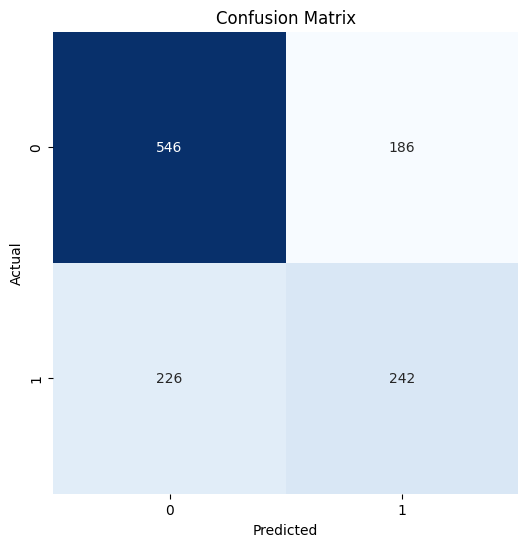

In [235]:
cm = confusion_matrix(y_test, predictions) #calculating confusion matrix
# plotting confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

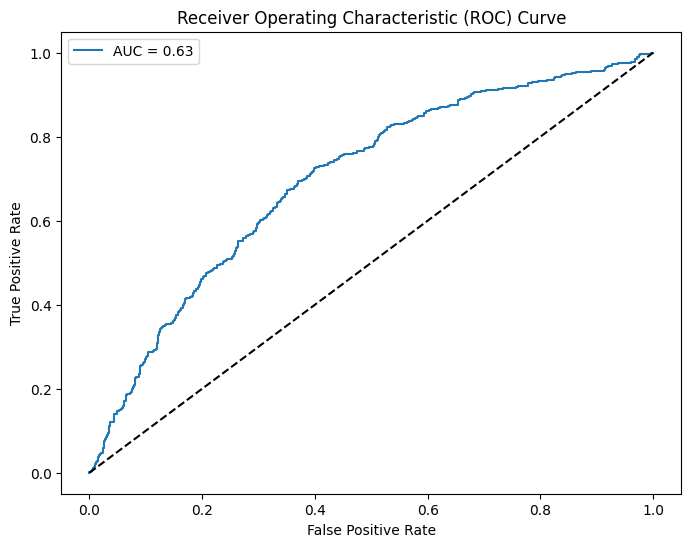

In [236]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(y_test, predictions)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

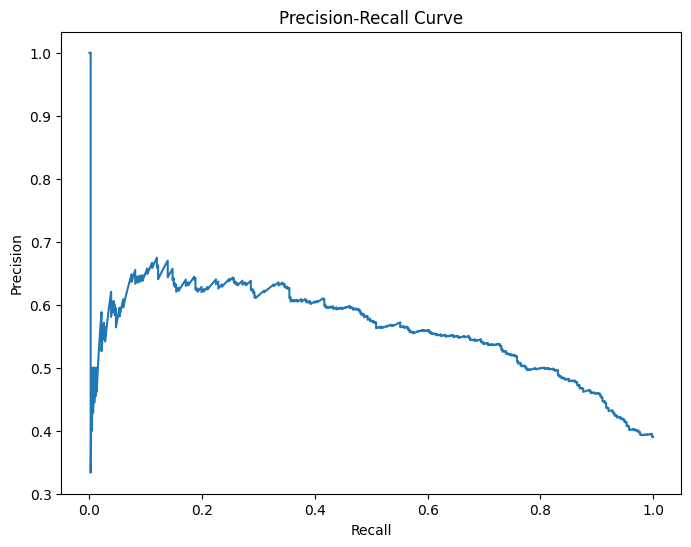

In [237]:
# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [238]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       732
           1       0.57      0.52      0.54       468

    accuracy                           0.66      1200
   macro avg       0.64      0.63      0.63      1200
weighted avg       0.65      0.66      0.65      1200



# Today arsenal plays west ham at Home, match starts at 21:15
### we now use the predictions from b365 and test what the final result should be.

In [239]:
Home_team = 'Arsenal'
Away_team = 'West Ham'
home_enc = df['HomeTeam_encoded']
away_enc = df['AwayTeam_encoded']
home_l = label_encoders['HomeTeam'].transform([Home_team])
away_l = label_encoders['HomeTeam'].transform([Away_team])
print(home_l)
print(away_l)

[0]
[37]


In [240]:
new_dp = ['1.300','6.300','10.000','0','37']
new_dp = np.array(new_dp).astype(float).reshape(1, -1)
new_dp[0]

array([ 1.3,  6.3, 10. ,  0. , 37. ])

In [241]:
#predict = model.predict(new_dp)

# We'll know at 21:15 + 90mins + ET if the model is correct

In [242]:
#predict[0] #Home victory 

In [243]:
feature_col_b365

['B365H', 'B365D', 'B365A', 'HomeTeam_encoded', 'AwayTeam_encoded']

In [244]:
coeff = model.coef_ 
feature_col_b365
coeff

array([[ 1.11699863e+00, -1.24919518e-01,  1.37830770e-02,
         5.04308918e-02, -5.63993123e-01, -3.49532136e-01,
        -2.50057883e-02, -3.98025800e-01,  1.73338138e-01,
        -1.65002591e-01,  2.01600492e-01,  2.09456770e-01,
        -1.08567386e-02,  4.68779054e-01,  2.00172624e-01,
        -8.54773741e-02,  1.90659197e-03, -1.06878941e-03]])

# Now we try NN method

In [245]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np

In [246]:
#print(df)
print(df_feature.shape)
#print(target_df)

(6000, 18)


In [247]:
X_train, X_test, y_train, y_test = train_test_split(df_feature, target_df, test_size=0.2, random_state=42)

In [248]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4800, 18)
(1200, 18)
(4800, 1)
(1200, 1)


### Initializing model

In [249]:
model = Sequential()

### Adding the dense layers

In [250]:
model.add(Dense(64, input_shape=(18,), activation='relu'))  #  input shape 18 according to feature dimensions
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error') 

### Fitting the model to the training data

In [251]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

### Making prediction on testing data

In [252]:
predictions = model.predict(X_test)

 1/38 [..............................] - ETA: 1s

38/38 [==============================] - 0s 442us/step


In [253]:
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2286126846840932


### The lower error also indicates the data was clean then, with no outliers. 

Lower MSE values indicate that the model has smaller errors on average and better fits the data. <br>
MSE is sensitive to outliers; larger errors have a greater impact on MSE. 

In [254]:
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

R-squared: 0.045433608667895586


A higher R-squared value (close to 1) indicates that the model explains a larger proportion of variance in the target variable.
R-squared doesn’t indicate whether the model's predictions are biased, only how well the features explain the variance in the target. <br>
It doesn’t provide information about the goodness of fit for new data. <br>

For R-squared, closer to 1 is better, indicating a better fit of the model to the data.
So we can see that this model didn't perform that well on the given data.

In [255]:
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Assuming 'df_feature' is your input features and 'target_df' is your target variable

# Convert DataFrame to numpy arrays
X = df_feature.values
y = target_df.values

# Define the number of folds for cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds)

# Lists to store MSE for each fold
mse_scores = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and compile the neural network model
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer (1 neuron for regression task)
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate Mean Squared Error for this fold
    mse = mean_squared_error(y_test, predictions)
    mse_scores.append(mse)

# Calculate mean MSE across all folds
mean_mse = np.mean(mse_scores)
print("Mean MSE across all folds:", mean_mse)

19/19 [==============================] - 0s 624us/step
Mean MSE across all folds: 0.22006309141036243


19/19 [==============================] - 0s 509us/step


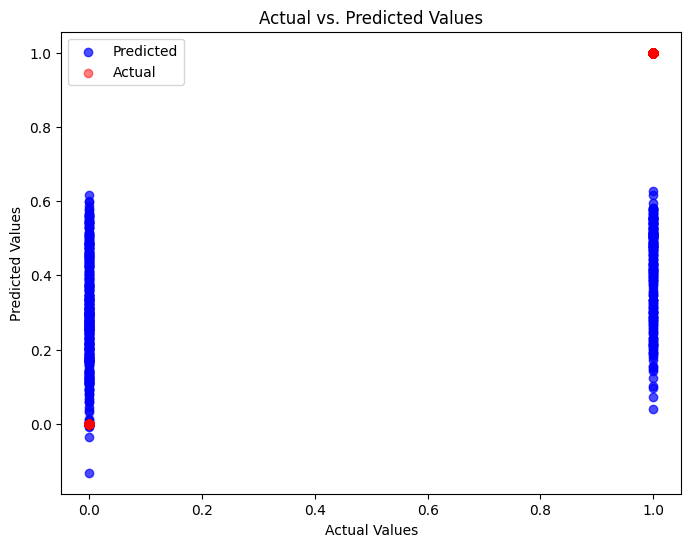

In [256]:
# Make predictions using the model
predictions = model.predict(X_test)

# Plotting actual vs. predicted values with different colors
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, c='blue', label='Predicted', alpha=0.7)  # Predicted values in blue
plt.scatter(y_test, y_test, c='red', label='Actual', alpha=0.5)  # Actual values in red
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values') 
plt.legend()
plt.show()

From the above plot we can say the model fits well but just not good enough

### We try other things now, Also arsenal lost yesterday 0-2 XD, so not a good model overall

In [257]:
df_2022 = pd.read_csv('EPL2022-23.csv')

In [258]:
df_2022.shape

(380, 108)

We can see the data is almost 4x longer that in its wide, we might not need special reduction techniques to filter the data. But the columns include more relevant data we can use to make predictions.  

Removing Div,refree, FTAG, FTHG (Full time home and away goals), FTR (used for prediction- target variable), bookie>2.5, <2.5 and avg, we don't want the prediction for number of goals yet. <br>
Also we have interesting data about C the closing change of each team before match starts. (I think it will have a good effect on the predicition). <br>
We also have data about foul play. Red, yellow, corners etc.
Removing the no. of goals odds might have a non-linear relationship with the data we can explore that later using models that perform well on non-linear data. 



I'm including the time of the match hoping that it does effect the result of the match, but we can explore that later. 

In [259]:
drop_col =['Div', 'Referee', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'B365C>2.5', 'B365C<2.5', 'PC>2.5','PC<2.5', 'MaxC>2.5','MaxC<2.5', 'AvgC>2.5','AvgC<2.5','FTHG','FTAG','FTR','HTR']
drop_col.__len__()

22

In [260]:
epl_col = df_2022.columns
drop_col = ['Div', 'Referee', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'FTHG', 'FTAG','FTR','HTR']

# Selecting columns to keep by excluding columns in drop_col from epl_col
feature_col = [col for col in epl_col if col not in drop_col]

df2022_features = df_2022[feature_col]
df2022_features.shape

#we had 106 and removed so now we have 86 as expected

(380, 86)

##  Label encoding teams


In [261]:
columns_to_encode = ['HomeTeam', 'AwayTeam']  # Columns containing team names to be label encoded

label_encoders = {}  # Dictionary to store label encoders for each column

for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df2022_features[column + '_encoded'] = label_encoders[column].fit_transform(df2022_features[column])
df2022_features.shape  #added 2 more

/tmp/ipykernel_7377/981592487.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022_features[column + '_encoded'] = label_encoders[column].fit_transform(df2022_features[column])
/tmp/ipykernel_7377/981592487.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022_features[column + '_encoded'] = label_encoders[column].fit_transform(df2022_features[column])


(380, 88)

## Removing team names

In [262]:
team_col = ['HomeTeam','AwayTeam']
df2022_features = df2022_features.drop(team_col,axis=1)
df2022_features.shape

(380, 86)

In [263]:
df2022_features.dtypes

Date                 object
Time                 object
HTHG                  int64
HTAG                  int64
HS                    int64
                     ...   
AvgCAHA             float64
FTR_NUM               int64
HTR_NUM               int64
HomeTeam_encoded      int64
AwayTeam_encoded      int64
Length: 86, dtype: object

In [264]:
df2022_features['Date'] = pd.to_datetime(df2022_features['Date'], format='%d/%m/%Y')
time_col =['Date','Time']
df2022_features = df2022_features.drop(time_col, axis=1)
df2022_features.drop('FTR_NUM',axis=1)

,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,...,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,HTR_NUM,HomeTeam_encoded,AwayTeam_encoded
0,0,1,10,10,2,2,16,11,3,5,...,1.84,2.04,1.88,2.09,1.88,2.03,1.85,0,6,0
1,1,0,9,11,3,4,7,9,4,4,...,2.03,1.91,2.02,2.01,2.06,1.89,1.99,1,8,11
2,1,0,7,15,3,2,18,16,5,5,...,2.00,1.93,2.00,1.94,2.04,1.88,2.00,1,2,1
3,1,1,12,15,4,6,13,9,6,4,...,1.85,2.10,1.84,2.14,1.87,2.08,1.81,2,9,19
4,0,0,23,5,10,0,9,14,11,1,...,1.96,1.99,1.93,2.19,1.97,2.03,1.86,2,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0,0,13,7,6,2,11,12,9,3,...,1.77,2.10,1.81,2.17,1.92,2.03,1.83,2,7,2
376,0,1,19,11,2,7,7,5,12,3,...,2.06,1.83,2.10,1.90,2.14,1.81,2.06,0,9,17
377,1,0,13,16,4,3,8,10,3,5,...,2.05,1.85,2.06,1.90,2.16,1.82,2.04,1,10,18
378,1,1,21,10,8,3,14,10,5,4,...,1.92,1.98,1.93,2.07,1.98,1.97,1.89,2,13,8


In [265]:
df2022_features.dtypes  #so all numbers we can use for Prediction. 

HTHG                  int64
HTAG                  int64
HS                    int64
AS                    int64
HST                   int64
                     ...   
AvgCAHA             float64
FTR_NUM               int64
HTR_NUM               int64
HomeTeam_encoded      int64
AwayTeam_encoded      int64
Length: 84, dtype: object

In [266]:
df2022_features

,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,...,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,FTR_NUM,HTR_NUM,HomeTeam_encoded,AwayTeam_encoded
0,0,1,10,10,2,2,16,11,3,5,...,2.04,1.88,2.09,1.88,2.03,1.85,0,0,6,0
1,1,0,9,11,3,4,7,9,4,4,...,1.91,2.02,2.01,2.06,1.89,1.99,2,1,8,11
2,1,0,7,15,3,2,18,16,5,5,...,1.93,2.00,1.94,2.04,1.88,2.00,1,1,2,1
3,1,1,12,15,4,6,13,9,6,4,...,2.10,1.84,2.14,1.87,2.08,1.81,1,2,9,19
4,0,0,23,5,10,0,9,14,11,1,...,1.99,1.93,2.19,1.97,2.03,1.86,1,2,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0,0,13,7,6,2,11,12,9,3,...,2.10,1.81,2.17,1.92,2.03,1.83,1,2,7,2
376,0,1,19,11,2,7,7,5,12,3,...,1.83,2.10,1.90,2.14,1.81,2.06,0,0,9,17
377,1,0,13,16,4,3,8,10,3,5,...,1.85,2.06,1.90,2.16,1.82,2.04,1,1,10,18
378,1,1,21,10,8,3,14,10,5,4,...,1.98,1.93,2.07,1.98,1.97,1.89,1,2,13,8


In [267]:
df2022_target = df2022_features['FTR_NUM'].copy()
df2022_target

0      0
1      2
2      1
3      1
4      1
      ..
375    1
376    0
377    1
378    1
379    2
Name: FTR_NUM, Length: 380, dtype: int64

In [268]:
df2022_features.drop('FTR_NUM', axis=1)

,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,...,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,HTR_NUM,HomeTeam_encoded,AwayTeam_encoded
0,0,1,10,10,2,2,16,11,3,5,...,1.84,2.04,1.88,2.09,1.88,2.03,1.85,0,6,0
1,1,0,9,11,3,4,7,9,4,4,...,2.03,1.91,2.02,2.01,2.06,1.89,1.99,1,8,11
2,1,0,7,15,3,2,18,16,5,5,...,2.00,1.93,2.00,1.94,2.04,1.88,2.00,1,2,1
3,1,1,12,15,4,6,13,9,6,4,...,1.85,2.10,1.84,2.14,1.87,2.08,1.81,2,9,19
4,0,0,23,5,10,0,9,14,11,1,...,1.96,1.99,1.93,2.19,1.97,2.03,1.86,2,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0,0,13,7,6,2,11,12,9,3,...,1.77,2.10,1.81,2.17,1.92,2.03,1.83,2,7,2
376,0,1,19,11,2,7,7,5,12,3,...,2.06,1.83,2.10,1.90,2.14,1.81,2.06,0,9,17
377,1,0,13,16,4,3,8,10,3,5,...,2.05,1.85,2.06,1.90,2.16,1.82,2.04,1,10,18
378,1,1,21,10,8,3,14,10,5,4,...,1.92,1.98,1.93,2.07,1.98,1.97,1.89,2,13,8


In [288]:
X_train, X_test, y_train, y_test = train_test_split(df2022_features, df2022_target, test_size=0.4, random_state=69)  #all N features are used to predict the target variable. 

# We use multinomial LogisticRegression

In [289]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

/home/adop/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [298]:
predictions_2022 = model.predict(X_test)
y_score_2022= model.predict_proba(X_test)

In [307]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print(classification_report(y_test, predictions))

Accuracy: 0.9671052631578947
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        39
           1       0.97      0.96      0.97        79
           2       0.97      1.00      0.99        34

    accuracy                           0.97       152
   macro avg       0.96      0.97      0.97       152
weighted avg       0.97      0.97      0.97       152



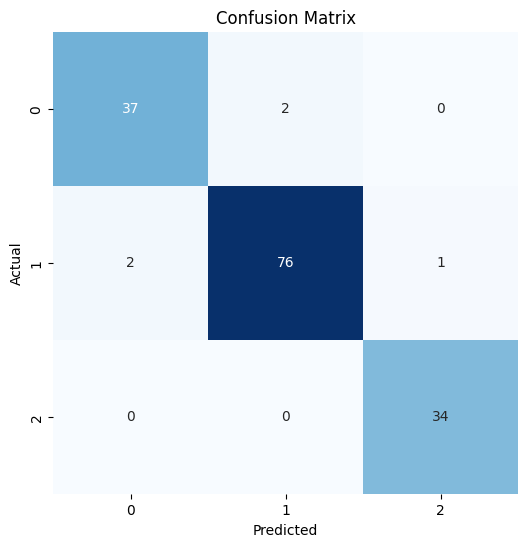

In [283]:
cm = confusion_matrix(y_test, predictions) #calculating confusion matrix
# plotting confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

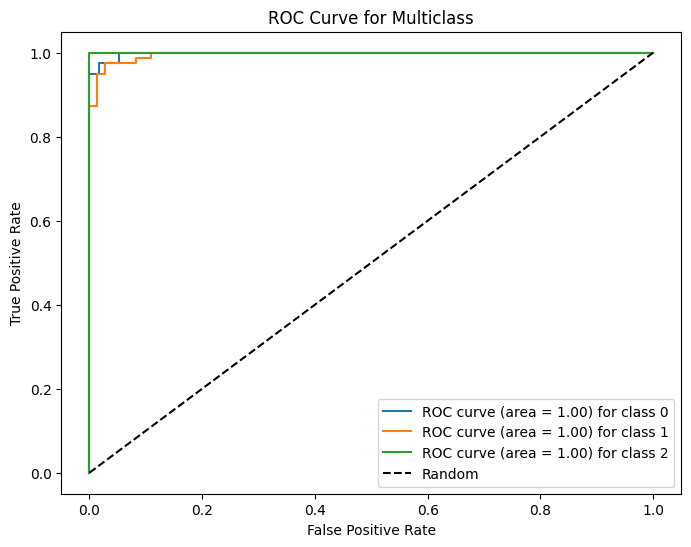

In [300]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming y_test and y_score are your true labels and predicted scores respectively

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Assuming 3 classes

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_2022[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(3):  # Assuming 3 classes
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass')
plt.legend(loc='best')
plt.show()

In [304]:
predictions_2022

array([2, 0, 2, 0, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1,
       0, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1, 1,
       2, 0, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1,
       0, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 1, 0,
       1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1])

In [306]:
from sklearn.metrics import precision_score, recall_score, classification_report

# Compute precision and recall for each class
precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)

class_report = classification_report(y_test, predictions)

print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("Classification Report:\n", class_report)


Precision for each class: [0.94871795 0.97435897 0.97142857]
Recall for each class: [0.94871795 0.96202532 1.        ]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        39
           1       0.97      0.96      0.97        79
           2       0.97      1.00      0.99        34

    accuracy                           0.97       152
   macro avg       0.96      0.97      0.97       152
weighted avg       0.97      0.97      0.97       152



# Making predictions on the ongoing season of football

In [326]:
df2023 = pd.read_csv('EPL2023-2024.csv')

In [327]:
df2023.shape

(188, 108)

In [328]:
def df_cleaner(bad_df):

    #making the feature df
    epl_col = bad_df.columns
    drop_col = ['Div', 'Referee', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'FTHG', 'FTAG','FTR','HTR']
    # Selecting columns to keep by excluding columns in drop_col from epl_col
    feature_col = [col for col in epl_col if col not in drop_col]
    bad_df_feature = bad_df[feature_col]
    print(bad_df_feature.shape)

    #adding label encoding to team names
    columns_to_encode = ['HomeTeam', 'AwayTeam']  # Columns containing team names to be label encoded
    label_encoders = {}  # Dictionary to store label encoders for each column
    for column in columns_to_encode:
        label_encoders[column] = LabelEncoder()
        bad_df_feature[column + '_encoded'] = label_encoders[column].fit_transform(bad_df_feature[column])
    print(bad_df.shape)  #added 2 more columns
    
    team_col = ['HomeTeam','AwayTeam']
    bad_df_feature = bad_df_feature.drop(team_col,axis=1)
    print(bad_df_feature.shape)

    bad_df_feature_target = bad_df_feature['FTR_NUM'].copy()
    df2022_features.drop('FTR_NUM', axis=1)

    time_col =['Date','Time']
    bad_df_feature = bad_df_feature.drop(time_col, axis=1)
    print(bad_df_feature.shape)

    return bad_df_feature, bad_df_feature_target
        

In [329]:
df2023_feature, df2023_target = df_cleaner(df2023)
df2023_feature

(188, 86)
(188, 108)
(188, 86)
(188, 84)


/tmp/ipykernel_7377/4243659091.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_df_feature[column + '_encoded'] = label_encoders[column].fit_transform(bad_df_feature[column])
/tmp/ipykernel_7377/4243659091.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_df_feature[column + '_encoded'] = label_encoders[column].fit_transform(bad_df_feature[column])


,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,...,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,FTR_NUM,HTR_NUM,HomeTeam_encoded,AwayTeam_encoded
0,0,2,6,17,1,8,11,8,6,5,...,1.95,1.97,NaN,NaN,1.92,1.95,0,0,5,12
1,2,0,15,6,7,2,12,12,8,3,...,1.93,1.97,2.01,2.09,1.95,1.92,1,1,0,15
2,0,0,14,16,5,3,9,14,10,4,...,2.01,1.92,2.06,1.96,1.96,1.91,2,2,2,18
3,1,0,27,9,12,3,11,12,6,7,...,2.00,1.91,2.14,1.93,2.00,1.86,1,1,4,11
4,0,0,19,9,9,2,12,6,10,4,...,2.04,1.88,2.08,1.99,1.98,1.88,0,2,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,1,3,14,11,4,5,5,14,8,2,...,1.93,1.98,1.99,2.05,1.89,1.97,0,0,3,19
184,1,1,9,13,4,5,13,16,4,3,...,2.07,1.86,2.08,1.92,1.98,1.86,1,2,6,7
185,1,0,7,23,2,9,13,5,8,4,...,1.73,2.23,1.89,2.25,1.78,2.09,0,1,8,12
186,2,0,15,19,9,3,18,6,7,6,...,1.88,2.05,1.95,2.08,1.88,1.99,1,1,4,17


In [333]:
df2023_feature = df2023_feature.fillna(0)

In [334]:
predictions_2023 = model.predict(df2023_feature)
y_score_2023= model.predict_proba(df2023_feature)

# Away - 0, Home - 1, Draw -2 

In [390]:
predictions_2023

array([0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 2, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2, 0,
       1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 2, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

# So last match was arsenal vs West Ham, Arsenal lost 0-2, and as seen the model predicts that nicely

# Now we use NN to make it better

In [402]:
X_train, X_test, y_train, y_test = train_test_split(df2022_features, df2022_target, test_size=0.4, random_state=69)  #all N features are used to predict the target variable.

In [403]:
y_train
#y_test

8      0
182    1
151    0
20     1
126    1
      ..
49     0
90     1
107    1
203    1
54     0
Name: FTR_NUM, Length: 228, dtype: int64

In [404]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(228, 84)
(152, 84)
(228,)
(152,)


In [409]:
model = Sequential()
model.add(Dense(64, input_shape=(84,), activation='relu'))  #  input shape 18 according to feature dimensions
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='sigmoid')) 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, 64)                5440      
                                                                 
 dense_211 (Dense)           (None, 32)                2080      
                                                                 
 dense_212 (Dense)           (None, 3)                 99        
                                                                 
Total params: 7619 (29.76 KB)


Trainable params: 7619 (29.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [410]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the custom validation data
evaluation = model.evaluate(X-X_test, y_test)
print("Custom Validation Loss:", evaluation[0])
print("Custom Validation Accuracy:", evaluation[1])

# Access training history for metrics
print("Training History:")
print(history.history.keys()) 

Epoch 1/10
8/8 [==============================] - 0s 14ms/step - loss: 1.7337 - accuracy: 0.3904 - val_loss: 1.3924 - val_accuracy: 0.5263
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 1.2009 - accuracy: 0.4693 - val_loss: 1.1821 - val_accuracy: 0.4605
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 1.0521 - accuracy: 0.4737 - val_loss: 1.0795 - val_accuracy: 0.4934
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.9772 - accuracy: 0.5482 - val_loss: 0.9994 - val_accuracy: 0.5526
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.9567 - accuracy: 0.5526 - val_loss: 0.9788 - val_accuracy: 0.5658
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.8997 - accuracy: 0.5702 - val_loss: 0.9735 - val_accuracy: 0.5724
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 0.8972 - accuracy: 0.5877 - val_loss: 0.9558 - val_accuracy: 0.5526
Epoch 8/10
8/8 [=================

Traceback (most recent call last):
  File "/home/adop/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_7377/2597906825.py", line 4, in <module>
    evaluation = model.evaluate(X-X_test, y_test)
  File "/home/adop/.local/lib/python3.10/site-packages/pandas/core/generic.py", line 2102, in __array_ufunc__
    return arraylike.array_ufunc(self, ufunc, method, *inputs, **kwargs)
  File "/home/adop/.local/lib/python3.10/site-packages/pandas/core/arraylike.py", line 273, in array_ufunc
    result = maybe_dispatch_ufunc_to_dunder_op(self, ufunc, method, *inputs, **kwargs)
  File "ops_dispatch.pyx", line 113, in pandas._libs.ops_dispatch.maybe_dispatch_ufunc_to_dunder_op
  File "/home/adop/.local/lib/python3.10/site-packages/pandas/core/ops/common.py", line 76, in new_method
    return method(self, other)
  File "/home/adop/.local/lib/python3.10/site-packages/pandas/core/arr

In [411]:
pred2023 = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [412]:
pred2023

array([[5.29381216e-01, 3.89342219e-01, 5.20691574e-01],
       [4.49276924e-01, 5.48313856e-01, 3.39598089e-01],
       [7.25334644e-01, 3.82363647e-01, 5.41068435e-01],
       [8.98173869e-01, 4.16643709e-01, 5.58584094e-01],
       [2.47734100e-01, 5.78849375e-01, 2.13817015e-01],
       [6.93383515e-01, 6.02924407e-01, 5.10888517e-01],
       [5.46146631e-02, 4.13111269e-01, 6.25342205e-02],
       [8.91283810e-01, 2.07532018e-01, 8.29431117e-01],
       [7.51285076e-01, 4.31122035e-01, 3.59069318e-01],
       [2.64473528e-01, 5.22159874e-01, 5.76371551e-01],
       [6.04989350e-01, 5.14610887e-01, 4.45810169e-01],
       [9.49349225e-01, 2.32030839e-01, 7.41927743e-01],
       [5.60131133e-01, 4.97786820e-01, 2.46788710e-01],
       [4.68149893e-02, 3.84052366e-01, 9.48390812e-02],
       [9.66705009e-02, 4.58851397e-01, 4.65323068e-02],
       [6.80848420e-01, 3.84713471e-01, 6.26974463e-01],
       [2.00383499e-01, 5.77933908e-01, 4.24663693e-01],
       [2.32685551e-01, 5.01825

In [401]:
y_test.shape

(152,)

In [384]:
mse = mean_squared_error(y_test, pred2023)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.13985583739410173


In [385]:
r2 = r2_score(y_test, pred2023)
print(f"R-squared: {r2}")

R-squared: 0.7081357359630271


In [386]:
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Assuming 'df_feature' is your input features and 'target_df' is your target variable

# Convert DataFrame to numpy arrays
X = df_feature.values
y = target_df.values

# Define the number of folds for cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds)

# Lists to store MSE for each fold
mse_scores = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and compile the neural network model
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer (1 neuron for regression task)
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate Mean Squared Error for this fold
    mse = mean_squared_error(y_test, predictions)
    mse_scores.append(mse)

# Calculate mean MSE across all folds
mean_mse = np.mean(mse_scores)
print("Mean MSE across all folds:", mean_mse)

19/19 [==============================] - 0s 553us/step
Mean MSE across all folds: 0.2241831408866967


19/19 [==============================] - 0s 563us/step


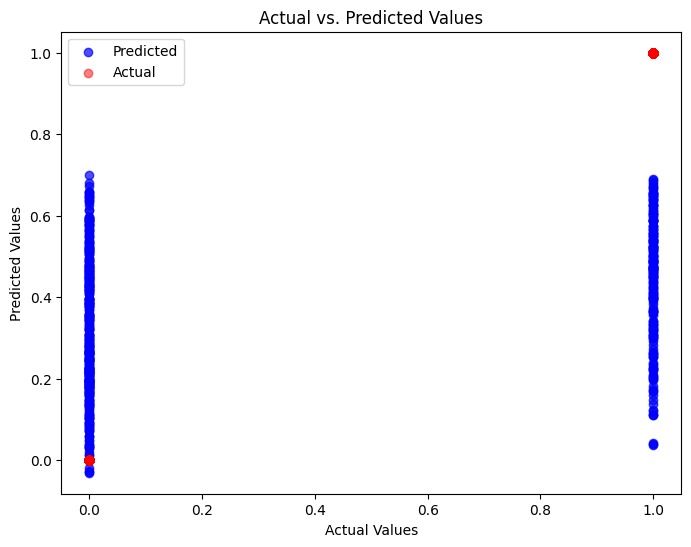

In [387]:
# Make predictions using the model
gr_predictions = model.predict(X_test)

# Plotting actual vs. predicted values with different colors
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gr_predictions, c='blue', label='Predicted', alpha=0.7)  # Predicted values in blue
plt.scatter(y_test, y_test, c='red', label='Actual', alpha=0.5)  # Actual values in red
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values') 
plt.legend()
plt.show()